In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:\\Users\\Kushagra\\Desktop\\DSE Final Project\\Customer_Churn_Expanded(new rows).csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   customerID        100000 non-null  object 
 1   gender            100000 non-null  object 
 2   SeniorCitizen     100000 non-null  int64  
 3   Partner           100000 non-null  object 
 4   Dependents        100000 non-null  object 
 5   tenure            100000 non-null  int64  
 6   PhoneService      100000 non-null  object 
 7   MultipleLines     100000 non-null  object 
 8   InternetService   100000 non-null  object 
 9   OnlineSecurity    100000 non-null  object 
 10  OnlineBackup      100000 non-null  object 
 11  DeviceProtection  100000 non-null  object 
 12  TechSupport       100000 non-null  object 
 13  StreamingTV       100000 non-null  object 
 14  StreamingMovies   100000 non-null  object 
 15  Contract          100000 non-null  object 
 16  PaperlessBilling  100

replacing blanks/empty spaces with 0 as tenure is 0 and no total charges are recorded 

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   customerID        100000 non-null  object 
 1   gender            100000 non-null  object 
 2   SeniorCitizen     100000 non-null  int64  
 3   Partner           100000 non-null  object 
 4   Dependents        100000 non-null  object 
 5   tenure            100000 non-null  int64  
 6   PhoneService      100000 non-null  object 
 7   MultipleLines     100000 non-null  object 
 8   InternetService   100000 non-null  object 
 9   OnlineSecurity    100000 non-null  object 
 10  OnlineBackup      100000 non-null  object 
 11  DeviceProtection  100000 non-null  object 
 12  TechSupport       100000 non-null  object 
 13  StreamingTV       100000 non-null  object 
 14  StreamingMovies   100000 non-null  object 
 15  Contract          100000 non-null  object 
 16  PaperlessBilling  100

In [6]:
df.isnull().sum().sum()

174

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,100000.000000,100000.000000,100000.000000,99826.000000
mean,0.161110,32.413070,64.729904,2286.255589
std,0.367634,24.578963,30.240614,2268.550038
min,0.000000,0.000000,13.536797,-30.693895
25%,0.000000,9.000000,35.625946,402.155383
50%,0.000000,29.000000,70.651713,1399.146504
75%,0.000000,55.000000,89.904332,3818.322036
max,1.000000,74.000000,123.692123,8731.349427


In [8]:
df["customerID"].duplicated().sum()

0

☝️ Above checks whether there is duplicate customer or not.


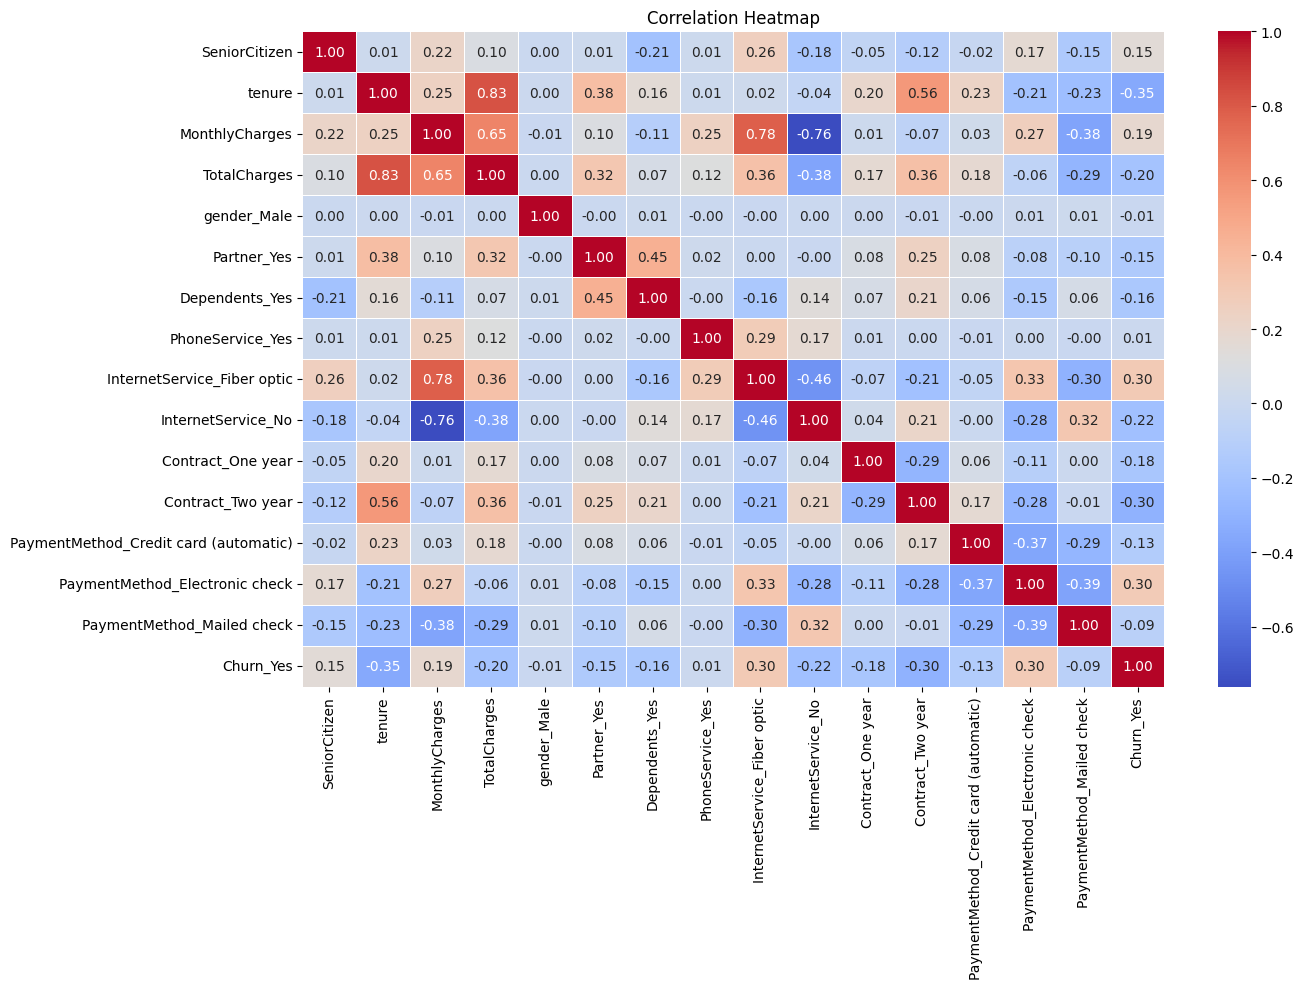

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("Customer_Churn_Expanded(new rows).csv")


columns_to_drop = ['customerID', 'name', 'email', 'phone', 'signup_date']  
df = df.drop(columns=columns_to_drop, errors='ignore')


categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 
                    'Contract', 'PaymentMethod', 'Churn']  # Adjust based on your dataset
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)


df_final = pd.concat([df[numeric_cols], df_encoded], axis=1)


corr_matrix = df_final.corr()


plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


☝️ Plotted a heatmap to show the relationship between different features in the data.


In [18]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

☝️ converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

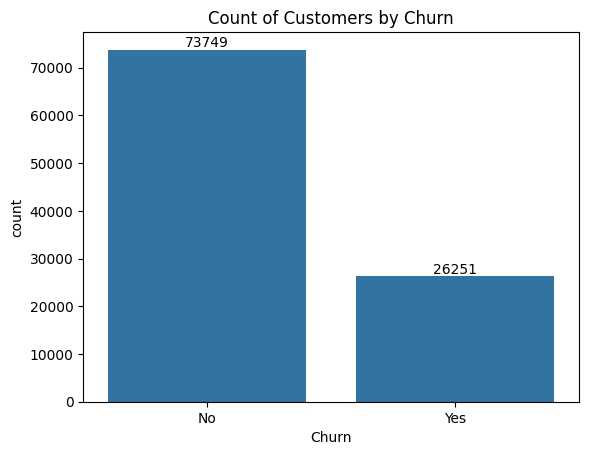

In [10]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

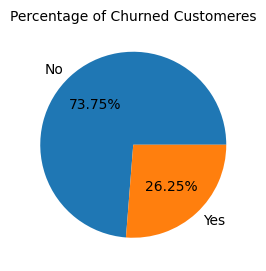

In [11]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customeres", fontsize = 10)
plt.show()

☝️ from the given pie chart we can conclude that 26.25% of our customers have churned out. 


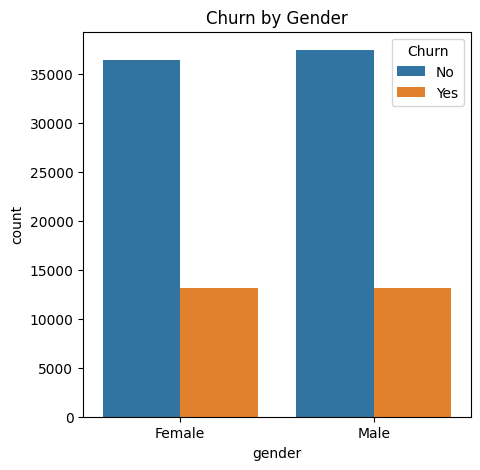

In [ ]:
plt.figure(figsize = (5,5))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

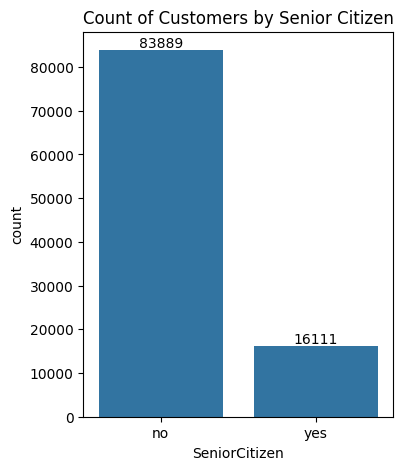

In [19]:
plt.figure(figsize = (4,5))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

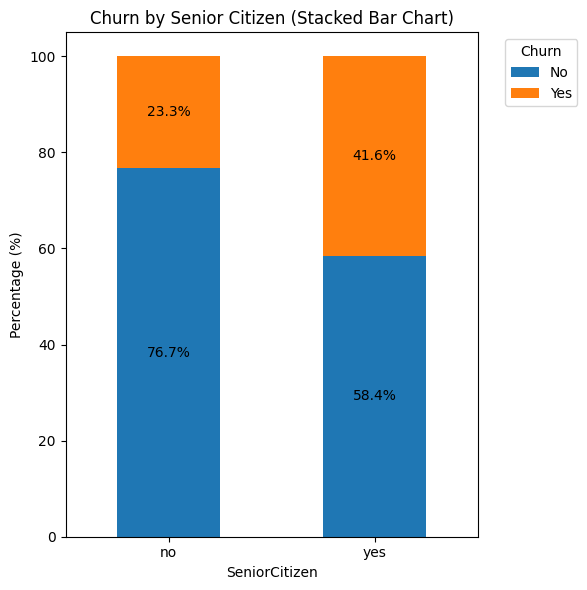

In [ ]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

fig, ax = plt.subplots(figsize=(6, 6))  

total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)


plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


☝️ comparative a greater pecentage of people in senior citizen category have churned

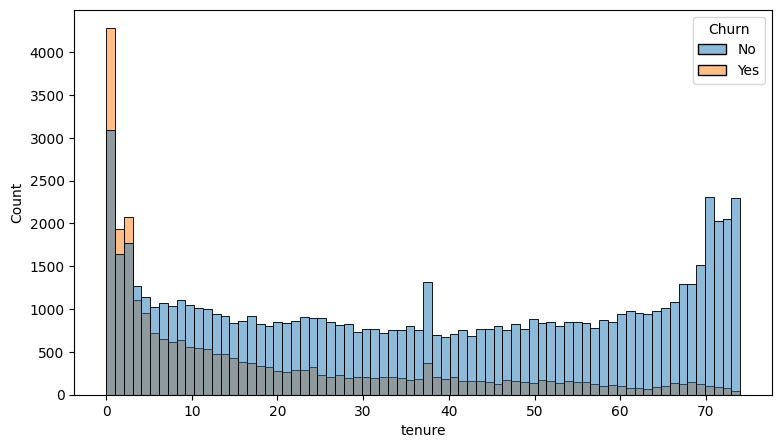

In [26]:
plt.figure(figsize = (9,5))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

☝️ people who have used our services for a long time have stayed and people who have used our sevices 
1 or 2 months  have churned

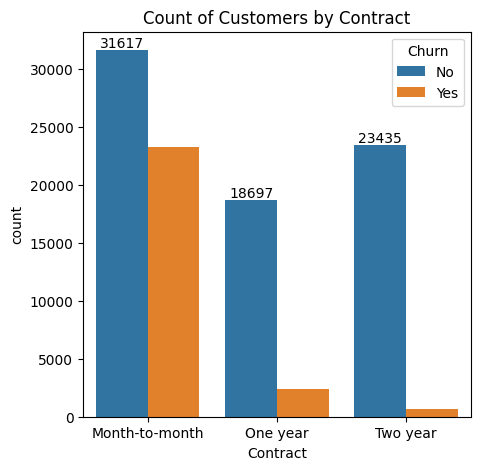

In [28]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

☝️ people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract. 

In [17]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

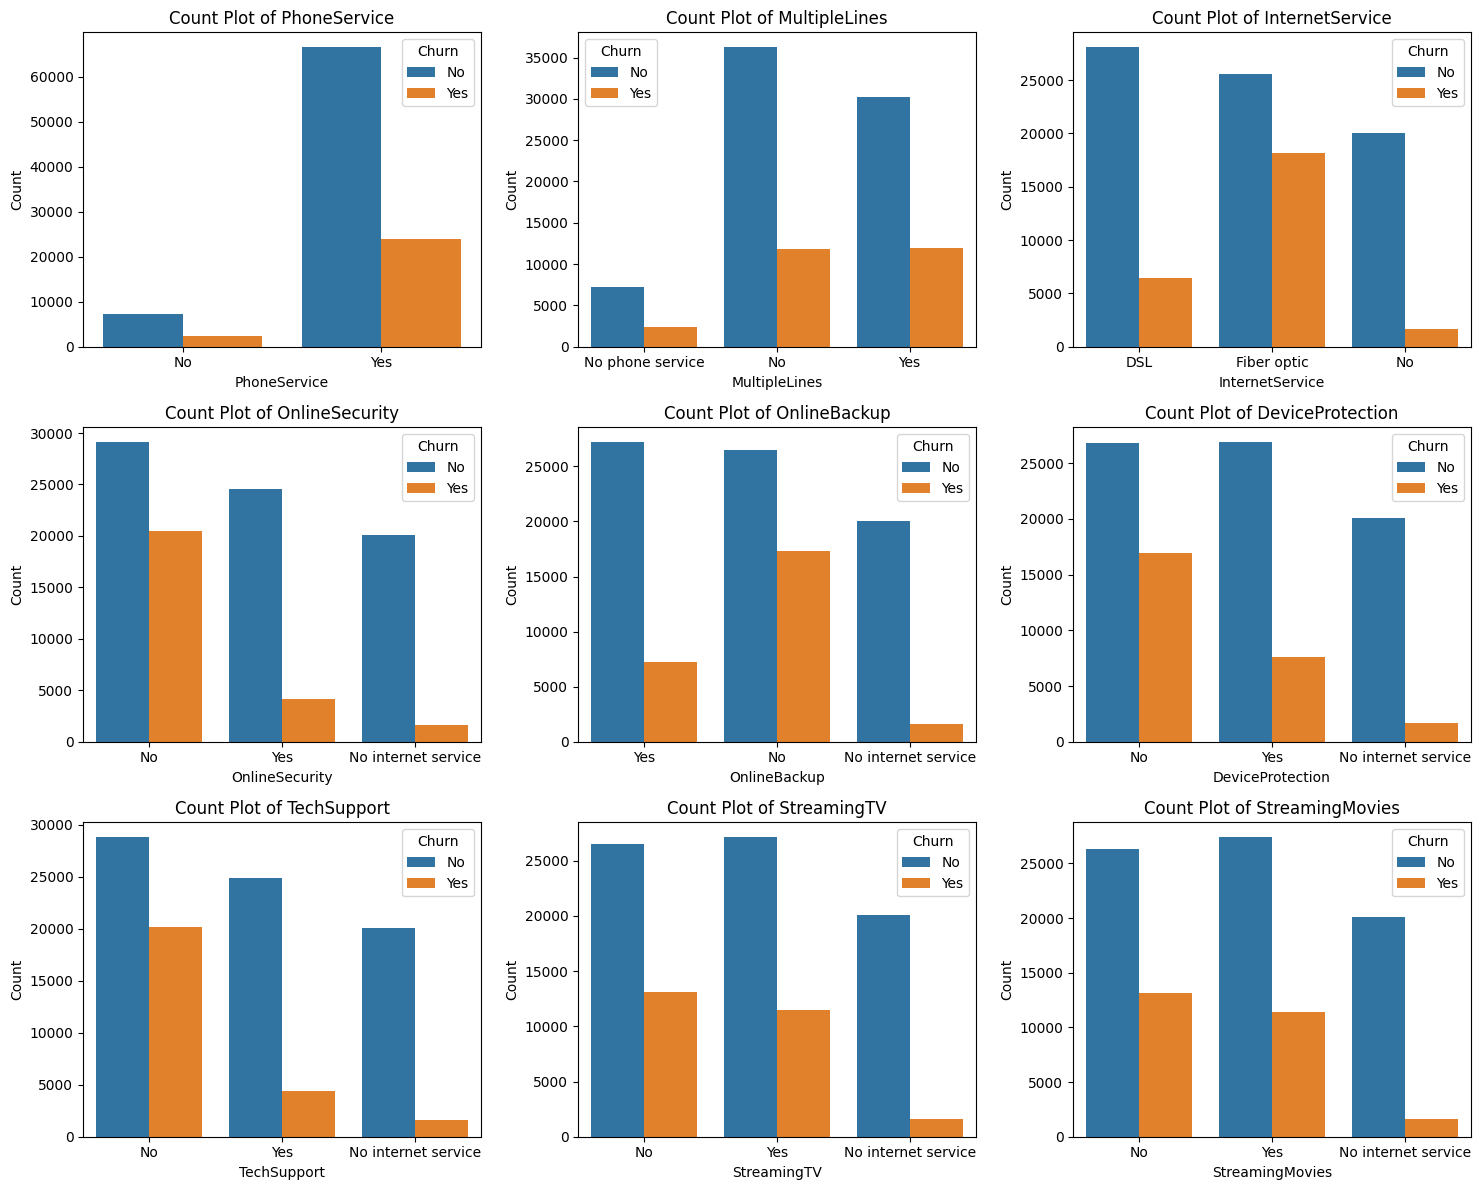

In [ ]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  


fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  


axes = axes.flatten()


for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

☝️ The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable. 

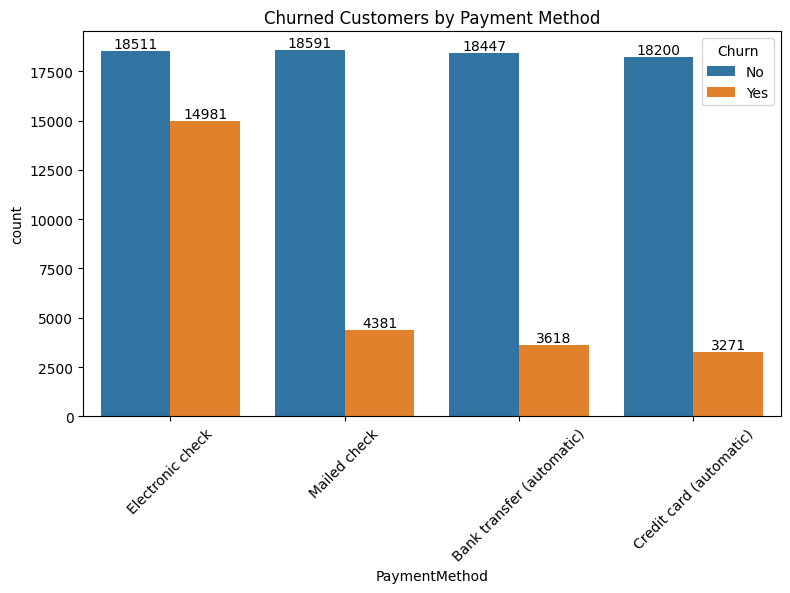

In [23]:
plt.figure(figsize = (9,5))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

☝️ Customer is likely to churn when he is using electronic check as a payment method. 

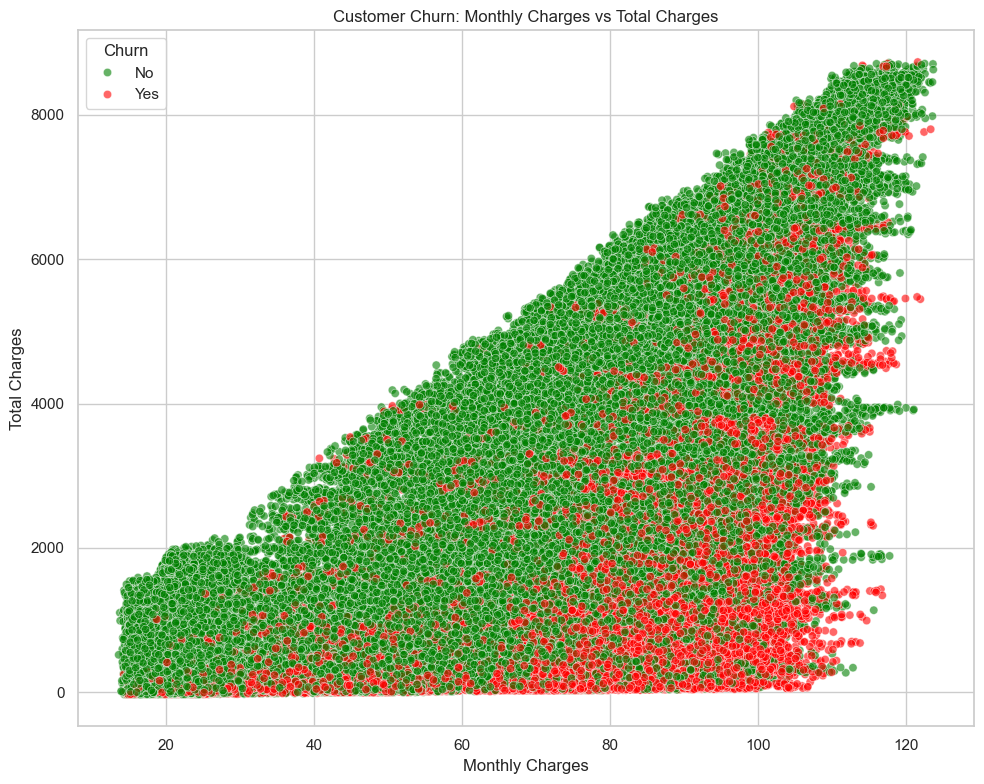

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


df_clean = df.dropna(subset=['MonthlyCharges', 'TotalCharges', 'Churn'])


sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_clean,
    x='MonthlyCharges',
    y='TotalCharges',
    hue='Churn',
    palette={'Yes': 'red', 'No': 'green'},
    alpha=0.6
)

plt.title('Customer Churn: Monthly Charges vs Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


☝️ Customers who churn often pay more per month but haven't stayed long enough to accumulate high total charges.

# Naive Bayes Classification

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv('C:\\Users\\Kushagra\\Desktop\\DSE Final Project\\Customer_Churn_Expanded(new rows).csv')


df.drop('customerID', axis=1, inplace=True)


df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


nb = GaussianNB()
nb.fit(X_train, y_train)


y_pred = nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7545
Confusion Matrix:
 [[11203  3515]
 [ 1395  3887]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.76      0.82     14718
           1       0.53      0.74      0.61      5282

    accuracy                           0.75     20000
   macro avg       0.71      0.75      0.72     20000
weighted avg       0.79      0.75      0.77     20000



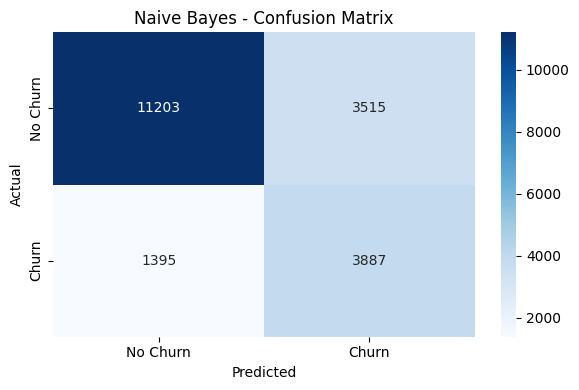

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes - Confusion Matrix')
plt.tight_layout()
plt.show()


# K means Clustering

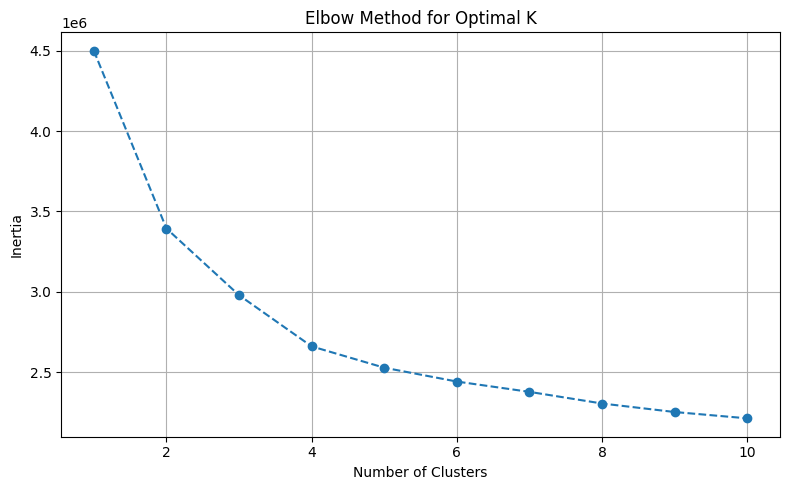


✅ Cluster-wise Summary (Mean of Numeric Features):
         SeniorCitizen     tenure  MonthlyCharges  TotalCharges
Cluster                                                        
0             0.223617  16.515255       74.399434   1264.681197
1             0.034059  30.488977       21.060098    667.143987
2             0.176374  54.693714       91.361780   5041.488605
3             0.149226  31.544272       41.914154   1487.326053


C:\Users\Kushagra\AppData\Local\Temp\ipykernel_36568\1391329310.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_encoded, x='Cluster', y='MonthlyCharges', palette='Set3')


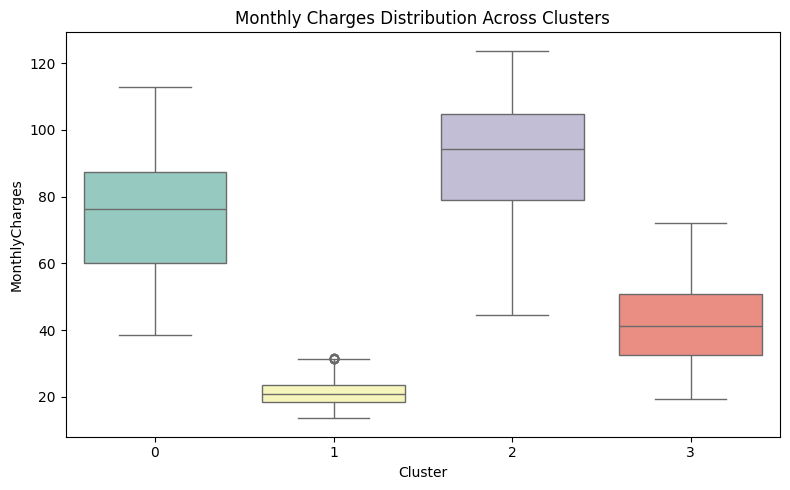

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Customer_Churn_Expanded(new rows).csv")


df.drop(['customerID', 'Churn'], axis=1, inplace=True)


df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


df_encoded = pd.get_dummies(df)


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)


inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()


k_final = 4 
kmeans_final = KMeans(n_clusters=k_final, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(df_scaled)


df_encoded['Cluster'] = clusters


numeric_columns = df_encoded.select_dtypes(include=['number']).columns
cluster_summary = df_encoded[numeric_columns].groupby('Cluster').mean()

print("\n✅ Cluster-wise Summary (Mean of Numeric Features):")
print(cluster_summary)


plt.figure(figsize=(8, 5))
sns.boxplot(data=df_encoded, x='Cluster', y='MonthlyCharges', palette='Set3')
plt.title('Monthly Charges Distribution Across Clusters')
plt.tight_layout()
plt.show()






🔍 Cluster Breakdown & Interpretation

📦 Cluster 0 – "New High-Spending Customers"
SeniorCitizen: ~22% of customers are seniors

Tenure: ~16.5 months → relatively new customers

MonthlyCharges: ~$74.40 → higher-than-average spend

TotalCharges: ~$1,264 → low lifetime spend (short tenure)

Interpretation: These customers are new but spend a lot each month. They might be subscribed to many services. Could be at risk of churn if they don’t feel they’re getting value for money.

🧓 Cluster 1 – "Loyal Low-Spending Customers"
SeniorCitizen: Only ~3% seniors → mostly younger users

Tenure: ~30.5 months → long-time users

MonthlyCharges: ~$21.06 → very low spenders

TotalCharges: ~$667.14 → low overall revenue

Interpretation: These are loyal, low-maintenance customers who likely use very few services. They may be stable, but not highly profitable.

💰 Cluster 2 – "High-Value Long-Term Customers"
SeniorCitizen: ~18% are seniors

Tenure: ~54.7 months → very long-term customers

MonthlyCharges: ~$91.36 → very high monthly spend

TotalCharges: ~$5,041 → high lifetime value

Interpretation: These are your best customers — long-term, committed, and very profitable. Ideal for loyalty rewards, VIP programs, or upselling.

🤔 Cluster 3 – "Average Mid-Tier Customers"
SeniorCitizen: ~15% seniors

Tenure: ~31.5 months → moderately tenured

MonthlyCharges: ~$41.91 → moderate spending

TotalCharges: ~$1,487 → mid-range lifetime value

Interpretation: Balanced users — they’re decent spenders with average tenure. Could be upsell targets to increase revenue and engagement.

